Imports

In [24]:
import pickle
from src.settings import ROOT_DIR
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


import_path = ROOT_DIR / 'results' / 'models' / 'posture'

Model load

In [25]:
with open(import_path / 'knn.pkl', 'rb') as file:
    knn_posture = pickle.load(file)

with open(import_path / 'svm.pkl', 'rb') as file:
    svm_posture = pickle.load(file)

Data load

In [26]:
#test
test_data_path = ROOT_DIR / 'data' / 'processed' / 'posture' / 'test.pkl'
test_data = pd.read_pickle(test_data_path)
#validation
val_data_path = ROOT_DIR / 'data' / 'processed' / 'posture' / 'val.pkl'
val_data = pd.read_pickle(val_data_path)
print(test_data.head())
print(val_data.head())

     mean_angleY_spine  classification
22         -101.650753               0
63          -11.549610               1
41           18.132925               0
111          28.708142               0
54         -172.340468               0
     mean_angleY_spine  classification
88           -7.658434               0
29          -19.776122               0
93           -0.930630               0
69           26.515155               0
100         -43.468046               0


In [27]:
X_test = test_data['mean_angleY_spine']
X_val = val_data['mean_angleY_spine']

In [28]:
# Suponiendo que 'mean_angleY_spine' es la segunda columna y 'classification' es la tercera columna
# Para el modelo SVM
svm_pred_test = svm_posture.predict(X_test.values.reshape(-1, 1))
svm_pred_val = svm_posture.predict(X_val.values.reshape(-1, 1))

# Para el modelo KNN
knn_pred_test = knn_posture.predict(X_test.values.reshape(-1, 1))
knn_pred_val = knn_posture.predict(X_val.values.reshape(-1, 1))


C:\Users\Usuario\.conda\envs\AIForIMUParkinsonData\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Usuario\.conda\envs\AIForIMUParkinsonData\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Usuario\.conda\envs\AIForIMUParkinsonData\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Usuario\.conda\envs\AIForIMUParkinsonData\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Obtaining results

In [29]:
# Extraer las etiquetas 'classification' de tus datos de prueba y validación
Y_test = test_data['classification']
Y_val = val_data['classification']

Obtaining metrics

In [30]:
# Evaluación del modelo SVM
svm_accuracy_test = accuracy_score(Y_test, svm_pred_test)
svm_accuracy_val = accuracy_score(Y_val, svm_pred_val)

svm_report_test = classification_report(Y_test, svm_pred_test)
svm_report_val = classification_report(Y_val, svm_pred_val)

svm_confusion_matrix_test = confusion_matrix(Y_test, svm_pred_test)
svm_confusion_matrix_val = confusion_matrix(Y_val, svm_pred_val)

# Evaluación del modelo KNN
knn_accuracy_test = accuracy_score(Y_test, knn_pred_test)
knn_accuracy_val = accuracy_score(Y_val, knn_pred_val)

knn_report_test = classification_report(Y_test, knn_pred_test)
knn_report_val = classification_report(Y_val, knn_pred_val)

knn_confusion_matrix_test = confusion_matrix(Y_test, knn_pred_test)
knn_confusion_matrix_val = confusion_matrix(Y_val, knn_pred_val)


C:\Users\Usuario\.conda\envs\AIForIMUParkinsonData\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\.conda\envs\AIForIMUParkinsonData\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\.conda\envs\AIForIMUParkinsonData\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Showing metrics

In [31]:
# Printing evaluation metrics for SVM model
print("Evaluation metrics for SVM model:")
print("Accuracy on test data:", svm_accuracy_test)
print("Accuracy on validation data:", svm_accuracy_val)
print("\nClassification report on test data:\n", svm_report_test)
print("\nClassification report on validation data:\n", svm_report_val)
print("\nConfusion matrix on test data:\n", svm_confusion_matrix_test)
print("\nConfusion matrix on validation data:\n", svm_confusion_matrix_val)

# Printing evaluation metrics for KNN model
print("\nEvaluation metrics for KNN model:")
print("Accuracy on test data:", knn_accuracy_test)
print("Accuracy on validation data:", knn_accuracy_val)
print("\nClassification report on test data:\n", knn_report_test)
print("\nClassification report on validation data:\n", knn_report_val)
print("\nConfusion matrix on test data:\n", knn_confusion_matrix_test)
print("\nConfusion matrix on validation data:\n", knn_confusion_matrix_val)


Evaluation metrics for SVM model:
Accuracy on test data: 0.6666666666666666
Accuracy on validation data: 0.8636363636363636

Classification report on test data:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.33      0.50      0.40        15
weighted avg       0.44      0.67      0.53        15


Classification report on validation data:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.00      0.00      0.00         3

    accuracy                           0.86        22
   macro avg       0.43      0.50      0.46        22
weighted avg       0.75      0.86      0.80        22


Confusion matrix on test data:
 [[10  0]
 [ 5  0]]

Confusion matrix on validation data:
 [[19  0]
 [ 3  0]]

Evaluation metrics for KNN mo

Confusion matrix for svm


<Axes: >

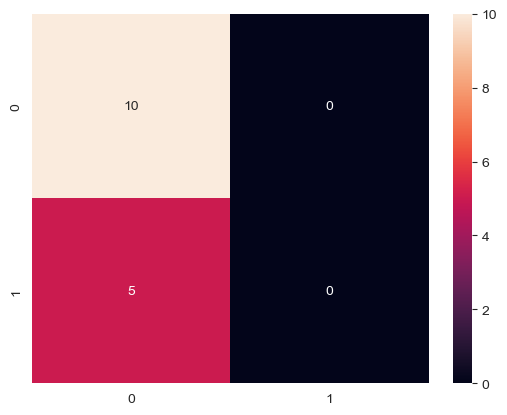

In [32]:
print('Confusion matrix for svm')
sns.heatmap(svm_confusion_matrix_test, annot=True)

Confusion matrix for knn


<Axes: >

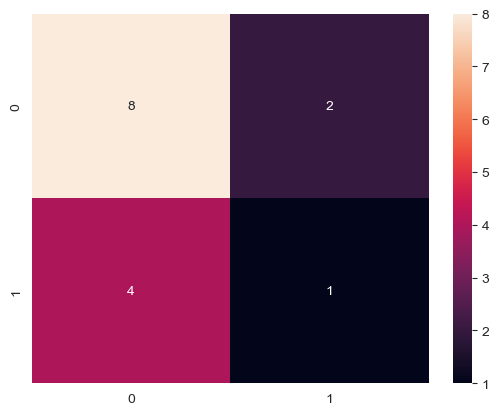

In [33]:
print('Confusion matrix for knn')
sns.heatmap(knn_confusion_matrix_test, annot=True)